In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../01_Data/02_Processed/cleaned_loan_data.csv')

In [3]:
df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_age_months,days_since_last_payment,days_since_last_credit_pull,credit_history_length,days_since_last_payment_log,loan_status_clean
0,0,3600.0,36,13.99,123.029999,C,10+ years,MORTGAGE,55000.0,Not Verified,...,2400.0,13734.0,Cash,N,150.0,-1,-60,187,-inf,0
1,1,24700.0,36,11.99,820.280029,C,10+ years,MORTGAGE,65000.0,Not Verified,...,62000.0,24667.0,Cash,N,194.0,943,-60,232,6.850126,0
2,2,20000.0,60,10.78,432.660004,B,10+ years,MORTGAGE,63000.0,Not Verified,...,6200.0,14877.0,Cash,N,186.0,578,-60,224,6.361302,0
3,4,10400.0,60,22.45,289.910004,F,3 years,MORTGAGE,104433.0,Source Verified,...,20300.0,88097.0,Cash,N,213.0,913,305,250,6.817831,0
4,5,11950.0,36,13.44,405.179993,C,4 years,RENT,34000.0,Source Verified,...,9400.0,4000.0,Cash,N,342.0,609,470,380,6.413459,0


In [26]:
df.shape

(1382352, 79)

In [4]:
constant_cols = []

for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)

constant_cols

['delinq_2yrs',
 'mths_since_last_delinq',
 'pub_rec',
 'total_rec_late_fee',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'open_act_il',
 'open_rv_12m',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pub_rec_bankruptcies',
 'tax_liens']

In [5]:
df=df.drop(columns=constant_cols)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382352 entries, 0 to 1382351
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1382352 non-null  int64  
 1   loan_amnt                    1382352 non-null  float64
 2   term                         1382352 non-null  int64  
 3   int_rate                     1382352 non-null  float64
 4   installment                  1382352 non-null  float64
 5   grade                        1382352 non-null  object 
 6   emp_length                   1382352 non-null  object 
 7   home_ownership               1382352 non-null  object 
 8   annual_inc                   1382352 non-null  float64
 9   verification_status          1382352 non-null  object 
 10  loan_status                  1382352 non-null  object 
 11  purpose                      1382352 non-null  object 
 12  addr_state                   1382352 non-n

In [8]:
!pip install category_encoders


In [9]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['addr_state'])
df['addr_state'] = target_encoder.fit_transform(df['addr_state'], df['loan_status_clean'])


In [10]:
df['addr_state'].head()

0    0.228276
1    0.228399
2    0.199401
3    0.228276
4    0.204562
Name: addr_state, dtype: float64

In [11]:
df['addr_state'].dtype

dtype('float64')

In [12]:
df['addr_state'].unique()[:10]

array([0.22827619, 0.22839943, 0.19940055, 0.20456177, 0.21531003,
       0.18315353, 0.19770726, 0.22769572, 0.21493008, 0.22017223])

In [13]:
df['addr_state'].describe()


count    1.382352e+06
mean     2.196344e-01
std      2.148970e-02
min      1.493671e-01
25%      2.149081e-01
50%      2.188331e-01
75%      2.343108e-01
max      2.927431e-01
Name: addr_state, dtype: float64

In [14]:
df['addr_state'].isnull().sum()

np.int64(0)

In [15]:
target_encoder.mapping

{'addr_state': addr_state
  1     0.228276
  2     0.228399
  3     0.199401
  4     0.204562
  5     0.215310
  6     0.183154
  7     0.197707
  8     0.227696
  9     0.214930
  10    0.220172
  11    0.214908
  12    0.232981
  13    0.238714
  14    0.243063
  15    0.218833
  16    0.184506
  17    0.231859
  18    0.257405
  19    0.174441
  20    0.221596
  21    0.253365
  22    0.237231
  23    0.171144
  24    0.221826
  25    0.233621
  26    0.149367
  27    0.209923
  28    0.204296
  29    0.221549
  30    0.162757
  31    0.231403
  32    0.217525
  33    0.234311
  34    0.165584
  35    0.278733
  36    0.159622
  37    0.196244
  38    0.261866
  39    0.235961
  40    0.166700
  41    0.185725
  42    0.182550
  43    0.254554
  44    0.228194
  45    0.292743
  46    0.186140
  47    0.234835
  48    0.165155
  49    0.217617
  50    0.221530
  51    0.217739
 -1     0.219634
 -2     0.219634
 dtype: float64}

In [18]:
numeric_df = df.select_dtypes(include=['int8','int16','int32','int64','float16','float32','float64'])
corr = numeric_df.corr()

corr


,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,addr_state,dti,fico_range_low,fico_range_high,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_age_months,days_since_last_payment,days_since_last_credit_pull,credit_history_length,days_since_last_payment_log,loan_status_clean
Unnamed: 0,1.000000,-0.023459,-0.007670,0.123910,-0.006610,-0.007099,-0.006665,-0.070196,0.041633,0.041633,...,-0.013667,-0.041874,-0.016050,-0.034157,-0.041988,0.237080,0.060305,0.001810,0.197340,-0.000958
loan_amnt,-0.023459,1.000000,0.383186,0.142457,0.956840,0.489378,-0.011181,0.033563,0.104713,0.104713,...,0.346154,0.318510,0.396095,0.213002,0.166594,-0.047205,0.016856,0.153369,-0.029664,0.076058
term,-0.007670,0.383186,1.000000,0.416805,0.154228,0.100402,0.001127,0.072956,0.000125,0.000125,...,0.115069,0.124633,0.070466,0.096751,0.039237,-0.013142,0.055325,0.037373,-0.005230,0.183984
int_rate,0.123910,0.142457,0.416805,1.000000,0.150740,-0.113210,0.021126,0.185145,-0.411751,-0.411751,...,-0.123641,0.015406,-0.239379,0.003194,-0.121300,0.079492,0.069711,-0.119888,0.078007,0.264940
installment,-0.006610,0.956840,0.154228,0.150740,1.000000,0.469727,-0.009998,0.039223,0.055984,0.055984,...,0.310731,0.299623,0.365047,0.196056,0.148348,-0.035526,0.009101,0.135252,-0.019356,0.060413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
days_since_last_payment,0.237080,-0.047205,-0.013142,0.079492,-0.035526,-0.042888,-0.018347,-0.086368,0.007601,0.007601,...,-0.056536,-0.060874,-0.069710,-0.070287,-0.068570,1.000000,0.447018,0.104191,0.891895,0.014684
days_since_last_credit_pull,0.060305,0.016856,0.055325,0.069711,0.009101,-0.050880,-0.011377,-0.034798,0.021654,0.021654,...,-0.033427,-0.044036,-0.013935,-0.057036,-0.036579,0.447018,1.000000,0.036207,0.409415,0.129186
credit_history_length,0.001810,0.153369,0.037373,-0.119888,0.135252,0.209495,-0.009977,0.032021,0.095255,0.095255,...,0.202974,0.115343,0.225346,0.023875,0.973612,0.104191,0.036207,1.000000,0.094258,-0.058615
days_since_last_payment_log,0.197340,-0.029664,-0.005230,0.078007,-0.019356,-0.030068,-0.013925,-0.062904,-0.010832,-0.010832,...,-0.041359,-0.043106,-0.061086,-0.053735,-0.050698,0.891895,0.409415,0.094258,1.000000,0.029876


<Axes: >

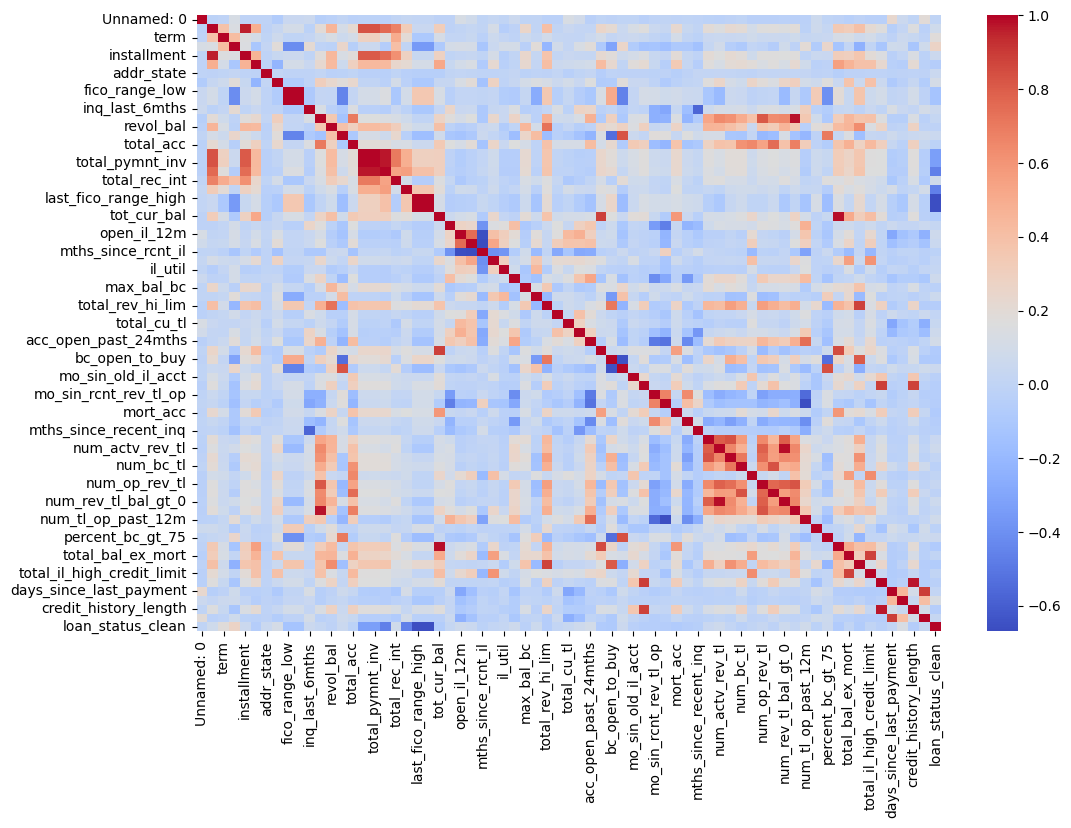

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')

In [27]:
df['annual_inc']=df['annual_inc'].replace(0,1)
df['loan_to_income_ratio']=df['loan_amnt']/df['annual_inc']
df['installment_to_income_ratio'] = df['installment'] / df['annual_inc']
df['loan_to_income_ratio'] = df['loan_to_income_ratio'].astype('float32')
df['installment_to_income_ratio'] = df['installment_to_income_ratio'].astype('float32')

In [29]:
df[['loan_to_income_ratio', 'installment_to_income_ratio']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_to_income_ratio,1382352.0,5.420599,351.072968,0.005000,0.127273,0.200000,0.291667,38000.000000
installment_to_income_ratio,1382352.0,0.158137,10.103714,0.000049,0.003959,0.006089,0.008786,1105.825073


In [30]:
# Cap extreme outliers
for col in ['loan_to_income_ratio', 'installment_to_income_ratio']:
    df[col] = df[col].clip(upper=df[col].quantile(0.99))


In [31]:
df[['loan_to_income_ratio', 'installment_to_income_ratio']].describe().T


,count,mean,std,min,25%,50%,75%,max
loan_to_income_ratio,1382352.0,0.215635,0.113155,0.005000,0.127273,0.200000,0.291667,0.500000
installment_to_income_ratio,1382352.0,0.006613,0.003500,0.000049,0.003959,0.006089,0.008786,0.016724


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382352 entries, 0 to 1382351
Data columns (total 81 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1382352 non-null  int64  
 1   loan_amnt                    1382352 non-null  float64
 2   term                         1382352 non-null  int64  
 3   int_rate                     1382352 non-null  float64
 4   installment                  1382352 non-null  float64
 5   grade                        1382352 non-null  object 
 6   emp_length                   1382352 non-null  object 
 7   home_ownership               1382352 non-null  object 
 8   annual_inc                   1382352 non-null  float64
 9   verification_status          1382352 non-null  object 
 10  loan_status                  1382352 non-null  object 
 11  purpose                      1382352 non-null  object 
 12  addr_state                   1382352 non-n

In [35]:
df.to_csv('../01_Data/02_Processed/final_features.csv',index=False)